In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import csv
import os

Import dataset

In [7]:
#==== Import Dataset ====
dataset = pd.read_csv('/content/drive/MyDrive/PercobaanTA/Dataset_KUKA_baru_bersih.csv')


dataset.dropna(inplace=True)
shuffled_dataset = dataset.sample(frac = 1)

pose = dataset.iloc[:, 6:]   # Input labels (last six columns)
jointsAngle = dataset.iloc[:, :6]   # Output features (first six columns)

shuffled_pose = shuffled_dataset.iloc[:, 6:]   # Input labels (last six columns)
shuffled_jointsAngle = shuffled_dataset.iloc[:, :6]   # Output features (first six columns)

pose_columns = ['Position x', 'Position y', 'Position z', 'Roll', 'Pitch', 'Yaw']  # Replace with your actual column names
jointsAngle_columns = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4', 'Joint 5', 'Joint 6']  # Replace with your actual column names

#==== Split Dataset ====
split_index = int(0.8 * len(dataset))


jointsAngle_train = jointsAngle[:split_index]
jointsAngle_test = jointsAngle[split_index:]
pose_train = pose[:split_index]
pose_test = pose[split_index:]

shuffled_jointsAngle_train = shuffled_jointsAngle[:split_index]
shuffled_jointsAngle_test = shuffled_jointsAngle[split_index:]
shuffled_pose_train = shuffled_pose[:split_index]
shuffled_pose_test = shuffled_pose[split_index:]

print(type(pose_test))
print(pose_test)


<class 'pandas.core.frame.DataFrame'>
       Position x    Position y  Position z        Roll     Pitch        Yaw
1227   787.547025  4.567113e+02  323.976440  180.000000  0.000000  88.516949
1228   801.534894  4.567113e+02  323.976440  180.000000  0.000000  88.554390
1229   813.524496  4.567113e+02  323.976440  180.000000  0.000000  88.586481
1230   824.514965  4.567113e+02  323.976440  180.000000  0.000000  88.615899
1231   837.503700  4.567113e+02  323.976440  180.000000  0.000000  88.650665
...           ...           ...         ...         ...       ...        ...
1529  1388.290901  6.990223e+02  323.976440  180.000000  0.000000  90.665996
1530  1384.910922  6.014985e+02  397.255398  179.638015  0.352430  88.958117
1531  1249.022266  3.021836e+02  586.183873  178.041906  0.699797  85.294053
1532   988.523583  7.484764e+01  683.705748  177.372996  0.057925  85.689122
1533   735.281986  1.437067e-07  669.937002  179.999999  0.000000  90.532848

[307 rows x 6 columns]


Experiment

Streaming output truncated to the last 5000 lines.
Epoch 123/3000
39/39 [==============================] - 0s 3ms/step - loss: 1.5399 - val_loss: 2.3615
Epoch 124/3000
39/39 [==============================] - 0s 3ms/step - loss: 1.1590 - val_loss: 1.8027
Epoch 125/3000
39/39 [==============================] - 0s 3ms/step - loss: 2.2468 - val_loss: 1.4816
Epoch 126/3000
39/39 [==============================] - 0s 3ms/step - loss: 1.4407 - val_loss: 1.7527
Epoch 127/3000
39/39 [==============================] - 0s 3ms/step - loss: 1.4494 - val_loss: 0.8699
Epoch 128/3000
39/39 [==============================] - 0s 3ms/step - loss: 1.1676 - val_loss: 3.4679
Epoch 129/3000
39/39 [==============================] - 0s 4ms/step - loss: 1.8244 - val_loss: 1.4736
Epoch 130/3000
39/39 [==============================] - 0s 4ms/step - loss: 2.0934 - val_loss: 2.0377
Epoch 131/3000
39/39 [==============================] - 0s 4ms/step - loss: 1.4174 - val_loss: 1.4504
Epoch 132/3000
39/39 [=========

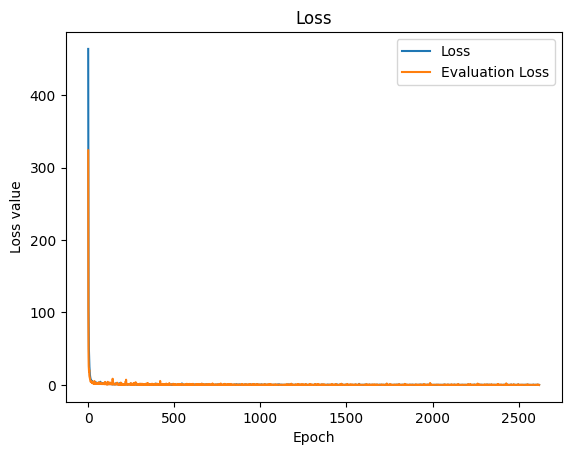

0.04893049597740173
0.08526954054832458
10/10 [==============================] - 0s 2ms/step
[[ -54.58135    -109.97918     137.96996      53.273563     46.63358
   -88.77002   ]
 [ -53.478397   -109.05637     137.36327      53.425556     45.66028
   -88.26137   ]
 [ -52.53301    -108.26543     136.84323      53.555847     44.82605
   -87.82542   ]
 ...
 [ -22.143602    -81.62987      86.81121      24.90464      48.084396
   -37.196507  ]
 [ -10.590432   -110.04602     103.217064     12.375349     55.969933
   -17.70803   ]
 [   0.66553545 -137.8042      118.92891      -0.5323023    63.698624
     1.0904394 ]]


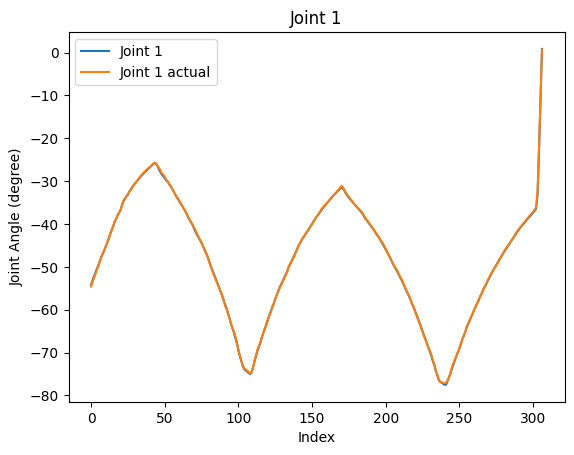

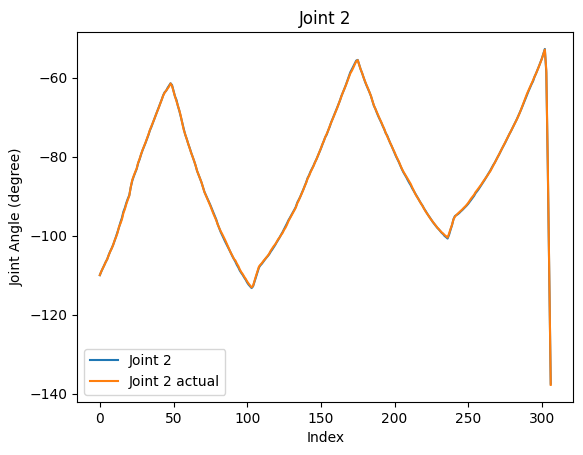

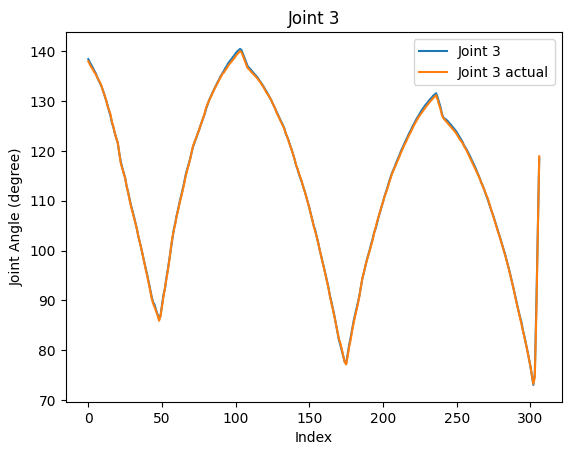

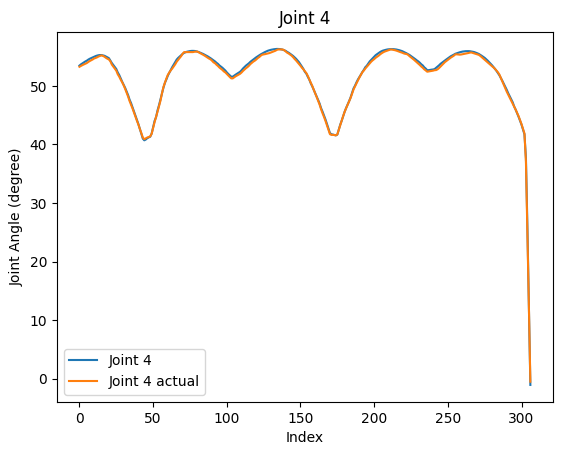

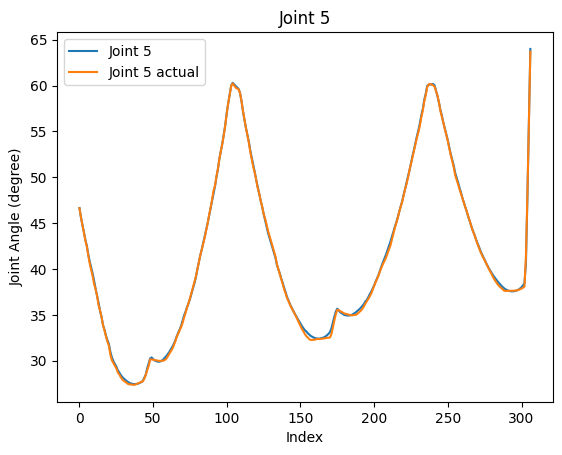

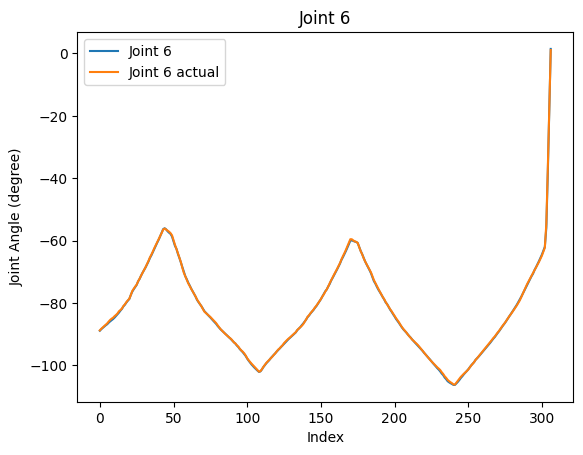

In [8]:

neuron = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 150, 200, 250,300]
learningRate = [0.001, 0.0001]

for learningRatei in learningRate:
    for neuroni in neuron:
      #Folder for saving the data
      folder_path = '/content/drive/MyDrive/PercobaanTA/DNN'+'_'+str(learningRatei)+'_3_'+str(neuroni)
      if os.path.exists(folder_path):
          continue
      os.makedirs(folder_path, exist_ok=True)


      #==== DNN Model ====
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.Dense(units=neuroni, activation='relu'))
      model.add(tf.keras.layers.Dense(units=neuroni, activation='relu'))
      model.add(tf.keras.layers.Dense(units=neuroni, activation='relu'))
      #model.add(tf.keras.layers.LSTM(units=300,  activation='relu', return_sequences=True))
      # Add more RNN layers if needed
      # model.add(...)
      # Add output layer
      model.add(tf.keras.layers.Dense(6))
      model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningRatei), loss='mse')

      #==== Target Function ====
      class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
          if(logs.get('val_loss') <= 0.05): # Experiment with changing this value
            print("\nReached loss less than 0.2 so cancelling training!")
            self.model.stop_training = True

      #==== Train Model ====
      callbacks = myCallback()


      #history = model.fit(pose_train, jointsAngle_train, epochs=3000, batch_size=32, callbacks=[callbacks])

      history = model.fit(shuffled_pose_train, shuffled_jointsAngle_train, epochs=3000, batch_size=32, validation_data=(shuffled_pose_test, shuffled_jointsAngle_test), callbacks=[callbacks])

      # Plot loss data
      loss_data = history.history['loss']
      loss_data_plotted = loss_data[1:]

      val_loss_data = history.history['val_loss']
      val_loss_data_plotted = val_loss_data[1:]

      plt.figure()
      plt.plot(range(len(loss_data_plotted)), loss_data_plotted, label='Loss')
      plt.plot(range(len(val_loss_data_plotted)), val_loss_data_plotted, label='Evaluation Loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss value')
      plt.title('Loss')
      plt.legend()
      # Save loss plot
      plt.savefig(os.path.join(folder_path, 'loss.png'))
      plt.show()

      print(val_loss_data[-1])
      print(loss_data[-1])

      # Write loss and eval loss value
      loss_file = folder_path + '/loss.txt'

      # Open the file in write mode
      with open(loss_file, 'w') as file:
          # Write content to the file
          file.write('Loss = '+str(loss_data[-1])+'\n')
          file.write('Eval loss = '+str(val_loss_data[-1])+'\n')
          file.write('Epoch = '+str(len(loss_data))+'\n')

      #==== Prediction Test ====
      pose_predict = model.predict(pose_test)

      print(pose_predict)

      # Save prediction data into csv file
      header = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4', 'Joint 5', 'Joint 6']
      rows = pose_predict.tolist()  # Convert predictions to a list
      csv_file = folder_path + '/Predictions_KUKA.csv'

      with open(csv_file, 'w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow(header)
          writer.writerows(rows)

      i = 0
      jointsAngle_test = jointsAngle[split_index:]
      joint = 1
      # Plot joint angle test data and joint angle prediction
      for column in jointsAngle_test:
          input_data = jointsAngle_test[column]
          predict_data = pose_predict[:, i]
          i = i+1
          plt.figure()
          plt.plot(range(len(input_data)), input_data, label=column)
          plt.plot(range(len(predict_data)), predict_data, label = column + ' actual')
          plt.xlabel('Index')
          plt.ylabel('Joint Angle (degree)')
          plt.title(column)
          plt.legend()
          # Save plot to folder
          plt.savefig(os.path.join(folder_path, 'A'+str(joint)+'.png'))
          joint = joint+1
          plt.show()



Octagon dataset

In [9]:
#==== Import Dataset ====
dataset = pd.read_csv('/content/drive/MyDrive/PercobaanTA/Octagon_dataset_bersih.csv')


dataset.dropna(inplace=True)
shuffled_dataset = dataset.sample(frac = 1)

pose = dataset.iloc[:, 6:]   # Input labels (last six columns)
jointsAngle = dataset.iloc[:, :6]   # Output features (first six columns)


pose_columns = ['Position x', 'Position y', 'Position z', 'Roll', 'Pitch', 'Yaw']  # Replace with your actual column names
jointsAngle_columns = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4', 'Joint 5', 'Joint 6']  # Replace with your actual column names


print(type(pose_test))
print(pose_test)


<class 'pandas.core.frame.DataFrame'>
       Position x    Position y  Position z        Roll     Pitch        Yaw
1227   787.547025  4.567113e+02  323.976440  180.000000  0.000000  88.516949
1228   801.534894  4.567113e+02  323.976440  180.000000  0.000000  88.554390
1229   813.524496  4.567113e+02  323.976440  180.000000  0.000000  88.586481
1230   824.514965  4.567113e+02  323.976440  180.000000  0.000000  88.615899
1231   837.503700  4.567113e+02  323.976440  180.000000  0.000000  88.650665
...           ...           ...         ...         ...       ...        ...
1529  1388.290901  6.990223e+02  323.976440  180.000000  0.000000  90.665996
1530  1384.910922  6.014985e+02  397.255398  179.638015  0.352430  88.958117
1531  1249.022266  3.021836e+02  586.183873  178.041906  0.699797  85.294053
1532   988.523583  7.484764e+01  683.705748  177.372996  0.057925  85.689122
1533   735.281986  1.437067e-07  669.937002  179.999999  0.000000  90.532848

[307 rows x 6 columns]


Test

1/1 [==============================] - 0s 22ms/step
[[  -5.357068   -92.16202    123.890724    13.960569    13.633883
   -16.91475  ]
 [ -16.981363   -95.30986    127.01185     39.534435    18.344633
   -49.877514 ]
 [ -25.749844  -106.560936   136.122       45.09207     25.418896
   -61.030727 ]
 [ -27.408237  -125.42883    147.07925     37.16154     32.345425
   -52.782467 ]
 [ -10.851968  -140.06819    152.21065     13.39961     34.24664
   -18.62966  ]
 [  10.392606  -131.1731     149.39722    -15.957952    28.455914
    21.94049  ]
 [  13.852554  -112.10984    139.62779    -29.457384    20.784761
    37.910526 ]
 [   6.3792505  -97.83292    129.099      -18.979836    14.898188
    23.037912 ]
 [  -5.3570666  -92.162025   123.890724    13.960572    13.633887
   -16.914751 ]]
Mean Squared Error: 0.8463578820228577


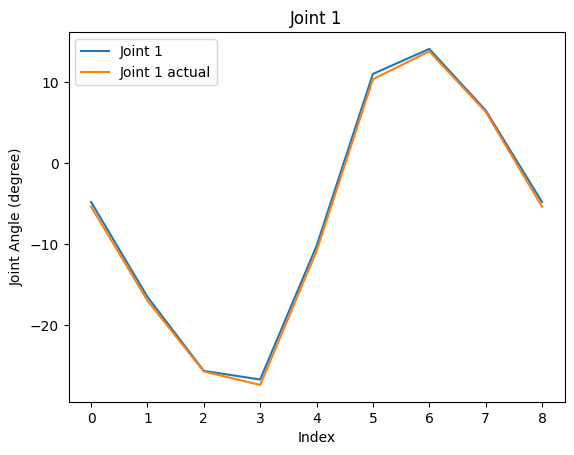

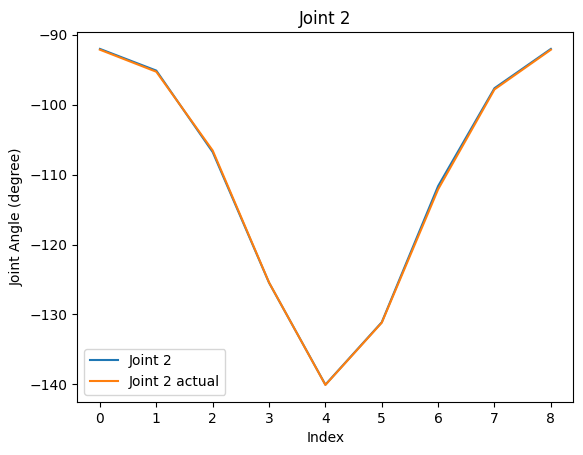

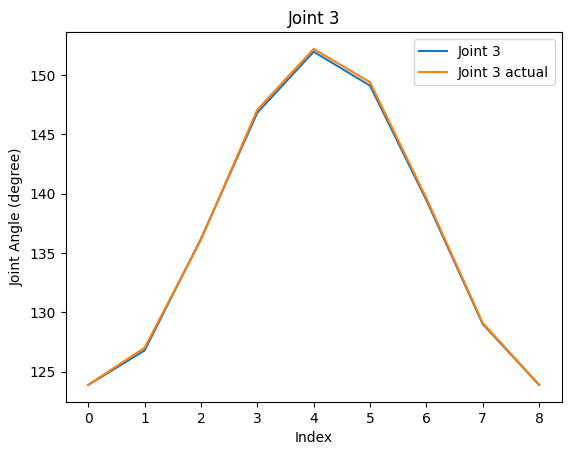

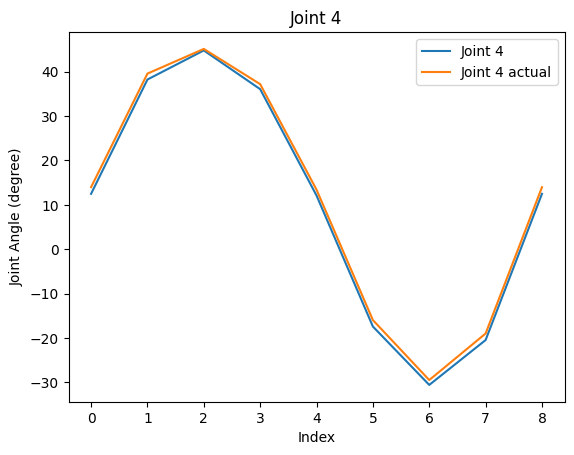

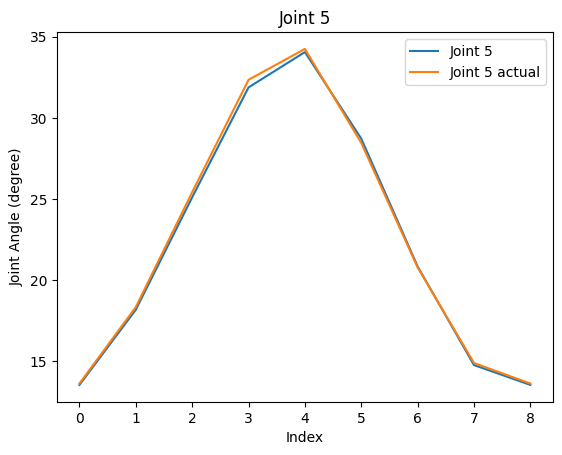

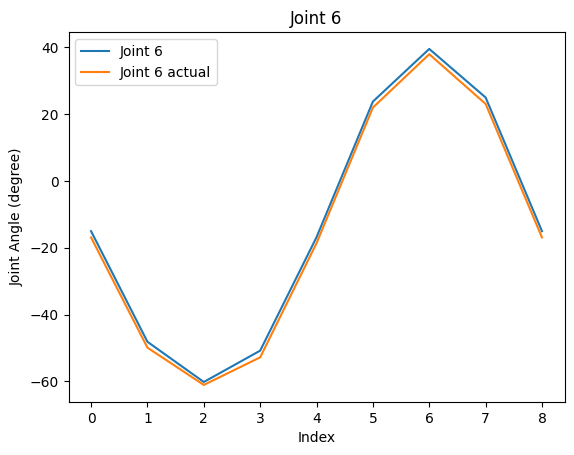

In [10]:
#Folder for saving the data
folder_path = '/content/drive/MyDrive/PercobaanTA/DNN'+'_'+str(learningRatei)+'_3_'+str(neuroni)+'/Octagon'
os.makedirs(folder_path, exist_ok=True)


#==== Prediction Test ====
pose_predict = model.predict(pose)

print(pose_predict)

# Calculate error
mse = tf.keras.losses.MeanSquaredError()(jointsAngle, pose_predict).numpy()
print(f"Mean Squared Error: {mse}")

# Write loss and eval loss value
error_file = folder_path + '/error.txt'

# Open the file in write mode
with open(error_file, 'w') as file:
    # Write content to the file
    file.write(f"Mean Squared Error: {mse}")

# Save prediction data into csv file
header = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4', 'Joint 5', 'Joint 6']
rows = pose_predict.tolist()  # Convert predictions to a list
csv_file = folder_path + '/Predictions_Octagon_KUKA.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(rows)

i = 0
jointsAngle_test = jointsAngle[split_index:]
joint = 1
# Plot joint angle test data and joint angle prediction
for column in jointsAngle:
    input_data = jointsAngle[column]
    predict_data = pose_predict[:, i]
    i = i+1
    plt.figure()
    plt.plot(range(len(input_data)), input_data, label=column)
    plt.plot(range(len(predict_data)), predict_data, label = column + ' actual')
    plt.xlabel('Index')
    plt.ylabel('Joint Angle (degree)')
    plt.title(column)
    plt.legend()
    # Save plot to folder
    plt.savefig(os.path.join(folder_path, 'A'+str(joint)+'.png'))
    joint = joint+1
    plt.show()